<h1><center><font size="6">Predicting Credit Card Fraud</font></center></h1>

<h3><center><font size="4"> https://www.kaggle.com/mlg-ulb/creditcardfraud </font></center></h2>

In [1]:
# We are going to focus on the data quantity first instead of quality through
# Undersampling, Oversampling techniques, Hybrid and custom techniques
# Outlier removal on the most important features and retesting it on the Random Forest classifier

# All of these are not going to be done in this week unlike the Telco Customer Churn dataset
# Data Cleansing using custom Python functions
# Identification of bad columns: those with nulls, blanks, constant values or duplicated features
# Prefix/Suffix removal
# Alphanumeric column splitting
# Time variable splitting
# Blank space conversion to np.nan

# The principle is that we should focus on following the framework we are doing exploration (ie the outcome is unknown)
# But throw away the framework and do the highest value activity when you clearly know that this is the best possible option

<a id="top"></a> <br>
## Table of Contents
1. [Introduction](#1)

1. [Initialization](#2)
    1. [Load Packages](#21)
    1. [Define Metadata](#22)
    
1. [Load Data & Validate](#3)
    
1. [Data Skewness Correction](#4)
    1. [Prepping before resampling](#41)
        1. [Feature Target and Train Test Split](#411)
        1. [Initializing Metrics Capture](#412)
        1. [Creating custom Functions to resample & test performance](#413)
    1. [Resampling Strategies](#42)
        1. [Resampling Method1: Undersampling - Random Undersampling](#421)
        1. [Resampling Method2: Oversampling - SMOTE](#422)
        1. [Resampling Method3: Hybrid Oversampling and Undersampling using SMOTEENN](#423)
        1. [Resampling Method4: Custom function to oversample at different rates](#424)
    
1. [Data Cleansing](#5)
    1. [Selecting top features using Feature Importances](#51)
    1. [Isolating the Fraudulent data points](#52)
    1. [Visualizing Distributions of top features](#53)
    1. [Outlier Definition, Detection & Removal](#54)
    1. [Testing Performance Improvement](#55)
    
1. [Intermediate Data Export](#6)

1. [References](#7)

## <a id='1'>Introduction</a>  

Continuing on from the previous week, the aim here is to improve upon our baseline model performance by focussing on the data. Given that the dataset is already free from null values but heavily skewed, the emphasis will be on improving the quantity of the data.

## <a id='2'>Initialization</a>  

### <a id='21'>Load Packages</a>  



Load the minimum number of packages to get started and add more as we go along

In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# This is to suppress any deprecation warnings 

import os

import sys
sys.path.append("/home/paperspace/Kaggle Grandmaster/Udemy Superstar/Classification") # Adds higher directory to python modules path.

### <a id='22'>Define Metadata</a>  

In [3]:
# Define the name of the target class column here instead of manually typing it out everywhere
target_class_name = 'Class'

# Fill in the names of what you want to call the 0 and 1 class
labels = ['Non-Fraud', 'Fraud']

input_file_name = 'creditcard.csv'

intermediate_data_path = '../intermediate data/'

output_df_file_name = 'week2_cleaned_df_output_' 

# Enter the date in which this notebook is run
export_date = '20200425'

In [4]:
# Check ou tthe names of the files in the input folder that we need to load as dataframe
import os
print(os.listdir('../input'))
# This will list all the files in this folder

['creditcard.csv']


## <a id='3'>Load Data & Validate</a>  

In [5]:
# Lets reload the same data as Week 1 because we deleted the rows containing the blanks from the TotalCharges column

In [6]:
df = pd.read_csv('../input/' + input_file_name)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
274060,165836.0,-0.628692,1.544919,-1.060445,1.248317,0.636382,-0.786698,1.355383,0.226026,-0.811048,...,0.132550,0.353854,0.042883,0.935601,0.025853,-0.427602,0.290622,0.229116,99.86,0
280007,169248.0,2.086519,-0.004307,-1.876689,0.356649,0.419219,-0.666105,0.028131,-0.076716,0.817845,...,-0.402261,-1.142784,0.332165,0.118395,-0.299625,0.202794,-0.073064,-0.038474,1.79,0
215460,140082.0,1.907364,-0.116589,-1.778886,0.503829,-0.002025,-1.212840,0.089034,-0.126561,0.621002,...,0.257975,0.687432,-0.034098,-0.107685,0.111343,-0.119155,-0.023670,-0.034964,50.00,0
119583,75503.0,1.102861,-0.099732,1.147501,1.092802,-1.074340,-0.373403,-0.625117,0.239579,0.479401,...,0.079233,0.091709,0.047339,0.472554,0.203221,-0.464621,0.037499,0.029023,19.88,0
102865,68404.0,-0.396829,0.970653,1.330348,-0.137273,0.095416,-0.602696,0.708046,-0.013551,-0.299187,...,-0.258833,-0.723420,-0.050035,-0.147503,-0.137638,0.103229,0.257592,0.115836,14.98,0



Lets check the head & tail to make sure there is nothing going on

In [7]:
df.head(3)
# What you are checking here is whether there are some unwanted headers from teh input file that 
# can corrupt our data
# If found, either open the file and manually delete it or only load the relevant columns

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [8]:
df.tail(3)
# similar logic here

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


No trouble with loading the data. Both the head and tail are clean

Because the data is clean and doesnt have any nulls, we can go ahead and start correcting for the skewness. We are going to hold off on the outlier detection and removal until after the data augmentation

## <a id = 4> Data Skewness Correction

Data always beats algorithm. 

Given that our dataset is heavily skewed in favor of the negative class (ie non-fraud),
any technique that brings the ratio closer to 50:50 should theoretically improve the performance.

The theoretical reason for favoring the 50:50 ratio is that the results will be no worse than what was obtained with natural class distributions.

https://www.researchgate.net/publication/2364670_The_Effect_of_Class_Distribution_on_Classifier_Learning_An_Empirical_Study

Broadly there are 2 approaches to data skewness correction: undersampling and oversampling
    
In Undersampling, we throw away the negative class until the remaining data is balanced.

In Oversampling, we sample  repeatedly the positive class until the synthetic data is balanced

There is also the hybrid approach where we sample both classes simultaneously until the minority class reaches a threshold and I will also introduce a custom function to generate samples.

But first, lets do some groundwork ....

### <a id = 41> Prepping before resampling

### <a id = 411> Feature Target and Train Test Split


Why should we do the train test split here rather than just before the modelling?

Because the data augmentation techniques should leave the Test set alone and only augment the train set. The Test set should be a valid representation of how the unseen unlabelled production data will occur during which time we wont have the luxury of correcting the imbalance


In [9]:
# Feature Target split
X = df.drop(target_class_name, axis=1)
y = df[target_class_name]

# split into train and test set and make sure to use the stratify = y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# These are the original dimensions and the class distributions
print(X_train.shape, X_test.shape, sum(y_train), sum(y_test))

# Notice how there are 98 Fraud samples in the Test set 

(227845, 30) (56962, 30) 394 98


### <a id = 412> Initializing Metrics Capture

Let me initialize a dataframe to hold relevant metrics for each of the augmentation techniques we are going to try

In [10]:
sampling_strategy_metrics_df = pd.DataFrame(
columns = ['Pos_Precision','Pos_Recall','Pos_F1',
           'ROC AUC','FN','TP','FP','TN','Precision_at_Recall'],
index = ['Undersampling','Oversampling','Hybrid','Custom'])

sampling_strategy_metrics_df

# Depending on the business problem, one or more of these metrics will be more important.
# Here lets assume that the Recall is what we are interested in 
# as long as the Precision is not too far off
# Unlike balanced datasets, the ROC AUC is a poor indicator here 
# because the algorithm can get 'good' scores by just predicting
# everything as the majority class.

# The prefixes exist for the Precision, Recall and F1 
# because I am only interested in the positive class

,Pos_Precision,Pos_Recall,Pos_F1,ROC AUC,FN,TP,FP,TN,Precision_at_Recall
Undersampling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oversampling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hybrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Custom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <a id = 413> Creating Test functions

Given that there are 4 techniques that I want to compare, its better to have a custom function that to avoid repeating code

In [11]:
# 11th of April 2020: created a wrapper around the usual model fitting and displaying classification metrics
def test_rf_performance_function(X_train, y_train, X_test, y_test, labels, recall_threshold=0.85):
    
    '''
    Args: The train and test data; labels to allow a human readable graph
    
    Logic: Trains a random forest classifier with default params 
    and outputs the classification report & confusion matrix
    
    Displays: The confusion matrix and classification report
    
    Returns: the metrics_dict containing the necessary binary metrics
    '''

    from sklearn.ensemble import RandomForestClassifier

    # Initialize a classifier object with default params
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)

    # Display the classification report on the Test data
    from helper_functions_comprehensive import custom_classification_metrics_function
    metrics_dict = custom_classification_metrics_function(
        X_test, y_test, labels, classifier, data_type='Test', output_metrics = True) 
    
    ### Added on the 17th of April 2020
    from helper_functions_comprehensive import precision_at_recall_threshold_function
    from helper_functions_comprehensive import classification_report, confusion_matrix, plot_confusion_matrix_function

    predicted_proba = classifier.predict_proba(X_test)[:,1]
    threshold_precision = precision_at_recall_threshold_function(y_test, predicted_proba, recall_threshold=0.85)
    
    # April 25th 2020
    metrics_dict['Precision_at_Recall'] = threshold_precision
    
    return metrics_dict
# test_rf_performance_function(X_train, y_train, X_test, y_test, labels, output_metrics = True)

I am going to create a wrapper around my metrics function to output the resampled train sets and test metrics

In [12]:
# I created this function so as not to have too many intermediate variables flying around
def resample_and_test_performance_function(ResampleMethod, X_train, y_train, X_test, y_test, labels):
    '''
    Args: imblearn method that has the fit_sample method to generate samples;
    the train, test data and the labels
    
    Logic: The imblearn method is called to generate the synthetic data
    
    Returns: the metrics dictionary which is actually generated by a separate function 
    
    '''
    
    # Generate the resampled data using one of the imblearn methods
    X_resampled_train, y_resampled_train = ResampleMethod.fit_sample(X_train, y_train)
    
    print('The size of the resampled train set is {}'.format(X_resampled_train.shape))
    print('The number of positive instances is {}'.format(sum(y_resampled_train)))
    
    # call the function to generate the plots and return the metrics
    metrics_dict  = test_rf_performance_function(
        X_resampled_train, y_resampled_train, X_test, y_test, labels)
    
    return X_resampled_train, y_resampled_train, metrics_dict

# This is how one would call the function
# _,__, sampling_strategy_metrics_df.loc['Undersampling'] = resample_and_test_function(
#                       RandomUnderSampler(), X_train, y_train, X_test, y_test, labels)

### <a id = 42> Resampling Strategies

There are many techniques for undersampling, oversampling and the hybrid approach. One popular API is imblearn available at
https://imbalanced-learn.readthedocs.io/en/stable/api.html

In this notebook, I am going to pick one implementation for each approach and compare results. 
The reader is encouraged to try all

### <a id = 411> Resampling Method1: Undersampling - RandomUnderSampler

In the first implementation, I am going to downsample my majority (negative) class using the RandomUnderSampler method as the name suggests, the algorithm randomly selects the minority class until the class ratio is the same

The reader is encouraged to select more sophisticated techniques available in imblearn API documentation

The size of the resampled train set is (788, 30)
The number of positive instances is 394
Has a Test accuracy of 96.0 % 
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.96      0.98     56864
       Fraud       0.04      0.90      0.08        98

   micro avg       0.96      0.96      0.96     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.96      0.98     56962

The ROC AUC Score on Test set is 0.97
Confusion matrix, without normalization
[[54808  2056]
 [   10    88]]


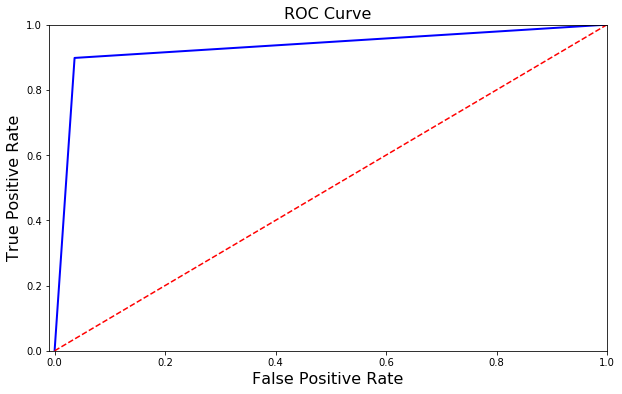

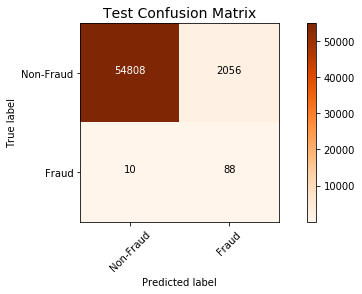

In [13]:
from imblearn.under_sampling import RandomUnderSampler

_,__, sampling_strategy_metrics_df.loc['Undersampling'] = resample_and_test_performance_function(
                    RandomUnderSampler(random_state=42), X_train, y_train, X_test, y_test, labels)

# Notice how the size of the downsampled dataset is exactly twice as large as the number of minority positive class

In [14]:
sampling_strategy_metrics_df

,Pos_Precision,Pos_Recall,Pos_F1,ROC AUC,FN,TP,FP,TN,Precision_at_Recall
Undersampling,0.0410448,0.897959,0.0785013,0.97,10,88,2056,54808,0.0992018
Oversampling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hybrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Custom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Though the Recall is better than our baseline, the fact that the Precision is so poor makes this model unusable
ie though we capture nearly 90% of our Frauds, we have too many False Positives. 

The Precision at Recall is terrible too

If the modelling efforts were to stop now, business will likely choose the baseline model from day1
because the False Positives are significantly lower and likely outweigh any benefits from increased capture of True Frauds

### <a id = 422>Resampling Method2: Oversampling - SMOTE

Next, I am going to try a popular oversampling technique for SMOTE
SMOTE stands for Synthetic Minority Over-sampling Technique and was presented in a 2002 paper here
https://jair.org/index.php/jair/article/view/10302/24590

this technique is theoretically superior to just oversampling with replacement for the minority class 
(the latter causes the decision tree to overfit)
In SMOTE, instead of sampling with replacement of the original minority class, synthetic new samples are generated
According to the article, Synthetic samples are generated in the following way: 

"Take the difference between the feature vector (sample)under consideration and its nearest neighbor. 
Multiply this difference by a random numberbetween 0 and 1, and add it to the feature vector under consideration.  
This causes the selection of a random point along the line segment between two specific features.  
This approach effectively forces the decision region of the minority class to become more general."

The size of the resampled train set is (454902, 30)
The number of positive instances is 227451
Has a Test accuracy of 100.0 % 
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.83      0.81      0.82        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.92      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962

The ROC AUC Score on Test set is 0.96
Confusion matrix, without normalization
[[56848    16]
 [   19    79]]


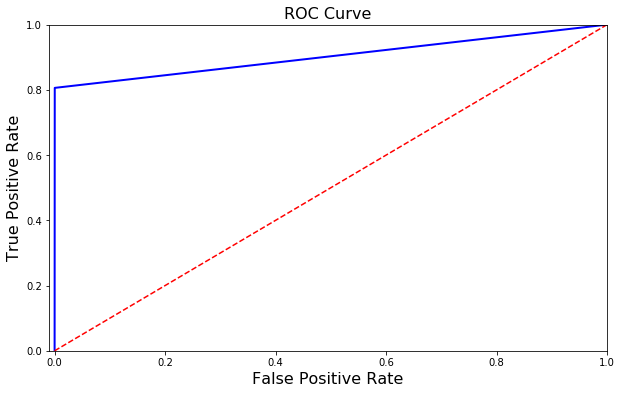

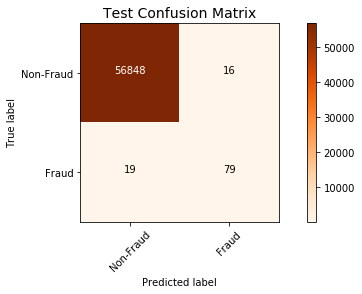

In [15]:
from imblearn.over_sampling import SMOTE

_,__, sampling_strategy_metrics_df.loc['Oversampling'] = resample_and_test_performance_function(
                                SMOTE(random_state=42), X_train, y_train, X_test, y_test, labels)

# Notice how the upsampled dataset is exactly twice as large as the number of minority positive class
# This is characteristic of SMOTE

In [16]:
sampling_strategy_metrics_df

,Pos_Precision,Pos_Recall,Pos_F1,ROC AUC,FN,TP,FP,TN,Precision_at_Recall
Undersampling,0.0410448,0.897959,0.0785013,0.97,10,88,2056,54808,0.0992018
Oversampling,0.831579,0.806122,0.818653,0.96,19,79,16,56848,0.68
Hybrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Custom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As seen above, the precision at recall metric is lower than that of the baseline model

If the modelling efforts were to stop now, business will choose the baseline model from the previous analysis because the precision at a recall of 85% custom metric we created was way better than the 68% seen here

Next, we are going to explore how the performance is affected if we go with a combination of upsampling and undersampling

### <a id = 423>Resampling Method3: Hybrid Oversampling and Undersampling using SMOTEENN

We are going to explore a strategy known as SMOTEENN
which combines the now-familiar SMOTE upsampling technique with ENN undersampling
https://imbalanced-learn.readthedocs.io/en/stable/api.html#module-imblearn.combine


ENN is Edited Nearest Neighbors which first oversamples both the minority and majority class until they are balanced.
Then the Tomek links are removed. This prevents the majority class from 'intruding' too deep into the minority class space
This is explained in the following paper https://pdfs.semanticscholar.org/c1a9/5197e15fa99f55cd0cb2ee14d2f02699a919.pdf

the original description of Tomek links is given in the IEEE paper from 1976
https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=4309452

The size of the resampled train set is (427652, 30)
The number of positive instances is 218370
Has a Test accuracy of 100.0 % 
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.84      0.83      0.84        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

The ROC AUC Score on Test set is 0.95
Confusion matrix, without normalization
[[56849    15]
 [   17    81]]


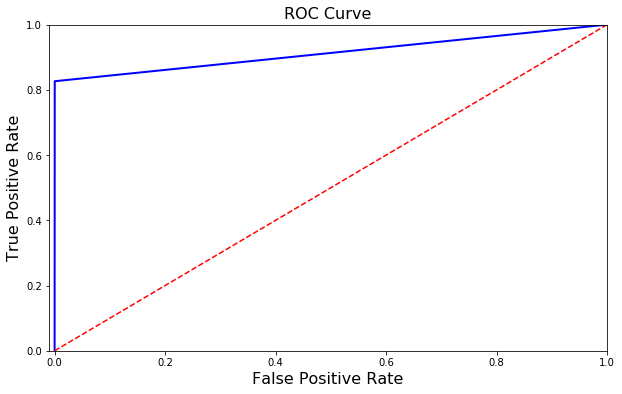

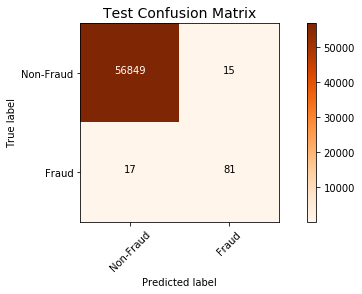

In [17]:
from imblearn.combine import SMOTEENN

# Note that unlike the previous 2 methods, SMOTEENN comes with the param for the sampling_strategy.
# The default is auto' which will select the minority class only but I chose to resample both classes

_,__, sampling_strategy_metrics_df.loc['Hybrid'] = resample_and_test_performance_function(
SMOTEENN(sampling_strategy = 'all' ,random_state=42), X_train, y_train, X_test, y_test, labels)

# Unlike the other resampling strategies, the resampled data size isnt easy to infer from the original data size

In [18]:
sampling_strategy_metrics_df

,Pos_Precision,Pos_Recall,Pos_F1,ROC AUC,FN,TP,FP,TN,Precision_at_Recall
Undersampling,0.0410448,0.897959,0.0785013,0.97,10,88,2056,54808,0.0992018
Oversampling,0.831579,0.806122,0.818653,0.96,19,79,16,56848,0.68
Hybrid,0.84375,0.826531,0.835052,0.95,17,81,15,56849,0.781818
Custom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is better than the other two resampling techniques but still lower than the baseline model

### <a id = 424>Resampling Method4: Custom function to oversample at different rates

In [19]:
# The generalized version of the oversampling is when we simultaneously upsample both the classes at different rates

In [20]:
# This function was inspired by the notebook from Kaggle
# https://www.kaggle.com/niteshx2/beginner-explained-lgb-2-leaves-augment
def augment_data_function(X_train, y_train, positive_upsampling_ratio=4, negative_upsampling_ratio=2): 
    
    '''
    Args:
    x - feature dataframe
    y - target series
    positive_upsampling_ratio - how much to upsample the positive class by
    negative_upsampling_ratio - how much to upsample the negative class by
    
    Logic: The two separate upsampling ratios allow you to independently control how much each class gets sampled
    While this was originally created to augment both classes simultaneously, 
    it can be used to deliberately upsample one class but not the other    
    

    Returns: augmented feature and target columns
    
    '''    
    # Always set the seed ! Otherwise you wont be able to replicate the results
    np.random.seed(42)
    
    # Convert the input dataframes into arrays
    x, y = X_train.values, y_train.values
    
    # create empty arrays for the positive and negative rows in the input data
    xs, xn = [], []
    
    # This code segment augments the positive class
    for i in range(positive_upsampling_ratio-1):
        
        # Create a mask for the positive class and augment those indices
        mask = y>0
        temp_array = x[mask].copy()
        ids = np.arange(temp_array.shape[0])
        
        # This is just to provide more randomness in shuffling. The actual data size doesnt change here
        # Shuffle it as many times as there are columns. More columns -> more shuffle
        for c in range(temp_array.shape[1]):
            
            # this shuffles the indices in place
            np.random.shuffle(ids)
            temp_array[:,c] = temp_array[ids][:,c]
            
        xs.append(temp_array)

    # This code segment augments the negative class. 
    # This results in the augmentation at a lower volume than the positive class above
    for i in range(negative_upsampling_ratio-1):
        
        # Create a mask for the negative class and augment those indices
        mask = y==0
        temp_array = x[mask].copy()
        ids = np.arange(temp_array.shape[0])
        
        
        for c in range(temp_array.shape[1]):
            np.random.shuffle(ids)
            temp_array[:,c] = temp_array[ids][:,c]
        
        # Append these back to the array that stores the negative labelled features
        xn.append(temp_array)
        
    
    xs = np.vstack(xs)
    xn = np.vstack(xn)
    
    # create an array of 1s and 0s with the same number of rows 
    # as the corresponding synthetically created feature matrices
    ys = np.ones(xs.shape[0])
    yn = np.zeros(xn.shape[0])
    
    # merge it back with the original data by stacking it one below the other
    x = np.vstack([x,xs,xn])
    y = np.concatenate([y,ys,yn])
    
    # convert the arrays back into dataframes
    X_resampled_df = pd.DataFrame(data=x, columns=X_train.columns)
    y_resampled = pd.Series(y)
    
    return X_resampled_df, y_resampled

### X_train_resampled, y_train_resampled = augment_data_function(X_train, y_train,  
#                                                    positive_upsampling_ratio=4, negative_upsampling_ratio=2)

### Typical Usage: within the stratified K Fold when you are augmenting the train portion and predicting on the other fold

# Limitations:
#     Only applicable for binary classes. If you want to use it for multi-class classification, then you would have to 
#     generalize the code starting with how the input is received

In [21]:
X_resampled_train, y_resampled_train = augment_data_function(X_train, y_train, 
                    positive_upsampling_ratio=4, negative_upsampling_ratio=2)
print(X_resampled_train.shape,sum(y_resampled_train))

(456478, 30) 1576.0


Has a Test accuracy of 100.0 % 
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.92      0.84      0.88        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962

The ROC AUC Score on Test set is 0.94
Confusion matrix, without normalization
[[56857     7]
 [   16    82]]


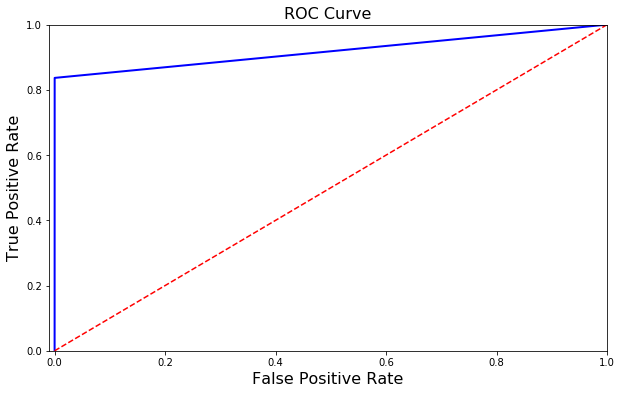

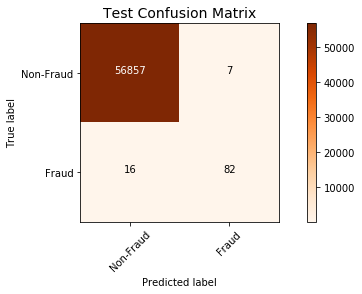

In [22]:
sampling_strategy_metrics_df.loc['Custom'] = test_rf_performance_function(
            X_resampled_train, y_resampled_train, X_test, y_test, labels)

In [23]:
sampling_strategy_metrics_df

,Pos_Precision,Pos_Recall,Pos_F1,ROC AUC,FN,TP,FP,TN,Precision_at_Recall
Undersampling,0.0410448,0.897959,0.0785013,0.97,10,88,2056,54808,0.0992018
Oversampling,0.831579,0.806122,0.818653,0.96,19,79,16,56848,0.68
Hybrid,0.84375,0.826531,0.835052,0.95,17,81,15,56849,0.781818
Custom,0.921348,0.836735,0.877005,0.94,16,82,7,56857,0.876289


The custom function's Recall and F1 score are superior any of the other resampling techniques seen so far
and close to the baseline model.

## <a id = 5> Data Cleansing

Lets try to further improve this performance by removing Outliers and rerunning the training. Which features do we focus our efforts on ? Instead of all the 30 features, aim to pick the top 5 based on the feature importance and get them cleaned up. 

### <a id = 51> Selecting top features - Feature Importances

Note that there are many methods to select the top features including using a Correlation Matrix with the Target Variable. Note that it doesnt really matter which data you use to get the feature importances

In [24]:
# Lets define a simple classifier based on the above augmented data

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 42)

# Fit on the resampled train data
classifier.fit(X_resampled_train, y_resampled_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [25]:
# Get the feature importances
feature_importances = classifier.feature_importances_

# Create a dataframe to hold the feature importances
feature_importances_df = pd.DataFrame({'feature': list(X.columns), 
'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances_df.head(5)
# Print from the highest to the lowest

,feature,importance
14,V14,0.284387
17,V17,0.180990
10,V10,0.140147
12,V12,0.127225
16,V16,0.033573


In [30]:
# Continue with the Outlier removal for the subset of the features identified above
imp_column_list = list(feature_importances_df.head(5)['feature'].values)
imp_column_list

['V14', 'V17', 'V10', 'V12', 'V16']

### <a id = 52> Isolating the Fraudulent data points

Given that our dataset is skewed, if we were to include the whole dataset in identifying the outliers, the concern is that the outliers from the non-fraud cases will swamp the signal from the fraud cases. Hence the right thing to do will be to focus on the subset of the data that is labelled as frauds, remove those and merge it back with the overall dataset.

As a first step, we need to join our features and target variable

In [27]:
# Concatenate the Features and the Target variable because we will be focussing on the fraud portion of the dataset
XY_resampled_train = pd.concat([X_resampled_train, y_resampled_train], axis = 1)
XY_resampled_train.rename(columns={0:target_class_name},inplace=True)

print(len(XY_resampled_train), sum(y_resampled_train))
XY_resampled_train.head()

456478 1576.0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0.0
1,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0.0
2,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0.0
3,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0.0
4,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0.0


In [28]:
# This dataframe stores only the subset of the fraud cases that have been previously generated from the train set
fraud_resampled_train_df = XY_resampled_train[XY_resampled_train[target_class_name]==1].copy()
non_fraud_resampled_train_df = XY_resampled_train[XY_resampled_train[target_class_name]==0].copy()

# Verify the splits have been done properly
len(fraud_resampled_train_df), len(non_fraud_resampled_train_df), len(XY_resampled_train)

# Makes sense because we augmented the positive class by 4x last time

(1576, 454902, 456478)

### <a id = 53> Visualizing Distributions of top features

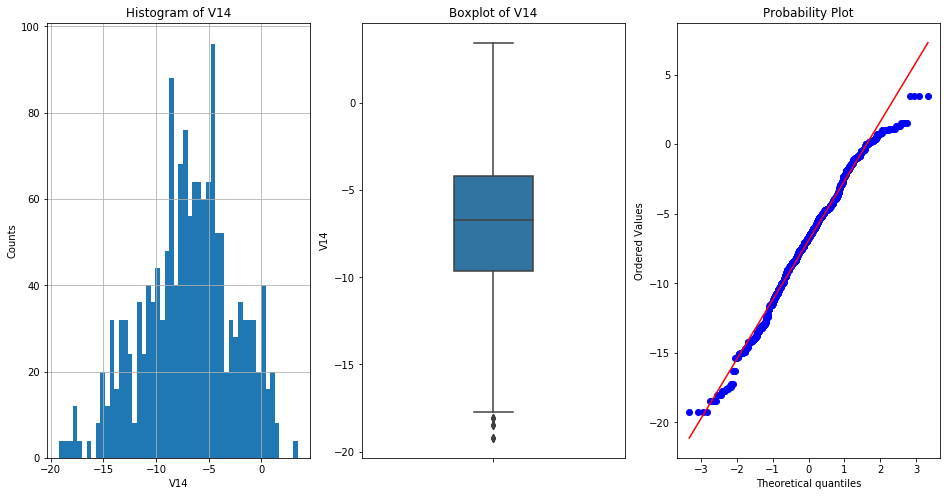

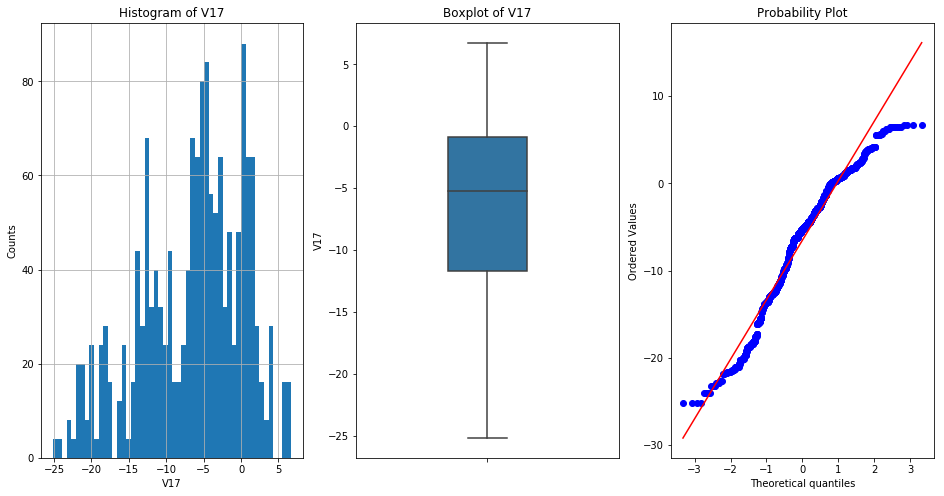

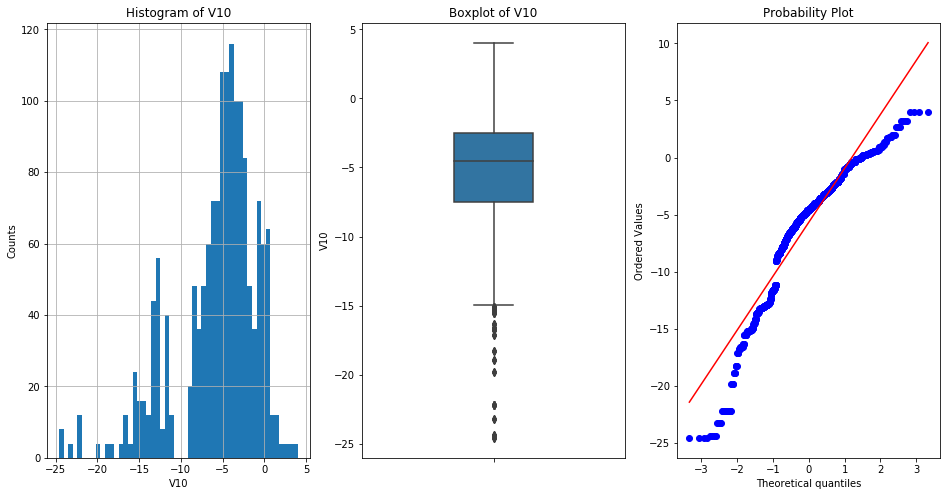

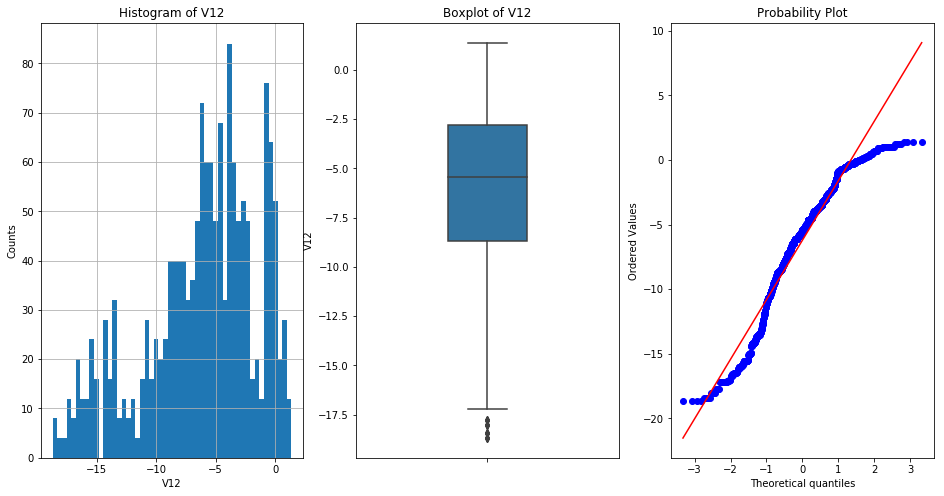

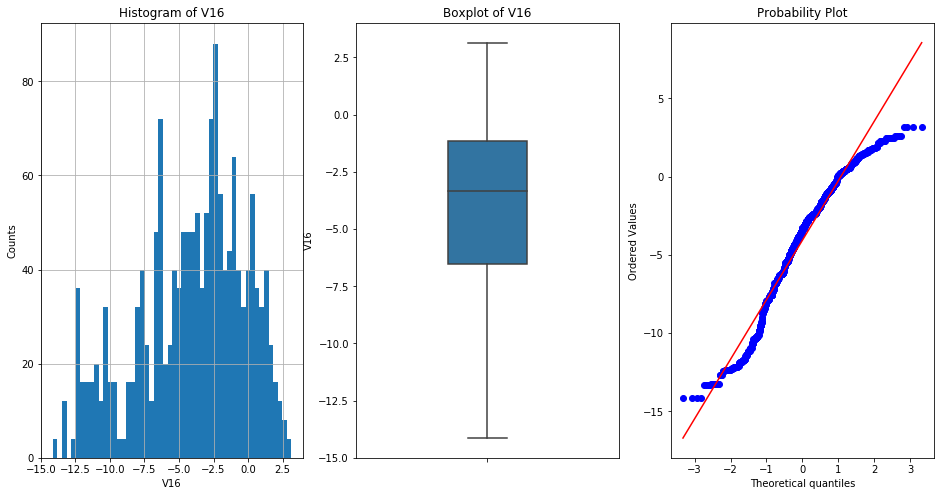

In [29]:
from helper_functions_comprehensive import numerical_distribution_function

# Use our custom function to generate the distributions, boxplots and the Quantiles
# You can specify a higher or lower bin size depending on the sample size

# Here I want roughly 30 data points on average to fall in each bin
no_of_bins = len(fraud_resampled_train_df)//30
numerical_distribution_function(fraud_resampled_train_df[imp_column_list], bins=no_of_bins)
# some of the variables look like they have smaller multi modal distributions

### <a id = 54> Outlier Definition, Detection & Removal

There are various qualitative and quantitative methods of defining outliers depending on the use case. Given that the data feature column headers have been anonymised, we are constrained to use only the quantitative techniques for outlier detection.

Even among the quantitative techniques, there are several approaches, the most popular one being the use of InterQuartile Distance to define the range in which the usual number of points lie. Other methods include the use of Z scores to identify the boundaries beyond which the data points can be removed. The comparison of these 2 is given here http://colingorrie.github.io/outlier-detection.html

In [31]:
# First check to make sure that the above code deletes the number of rows correctly

# create a dataframe to store the summary stats and the respective cutoffs for the columns
outlier_cutoff_df = fraud_resampled_train_df[imp_column_list].quantile([0.25,0.75]).T
outlier_cutoff_df['lower_cutoff'] = outlier_cutoff_df[0.25] - 1.5*(outlier_cutoff_df[0.75] - outlier_cutoff_df[0.25])
outlier_cutoff_df['upper_cutoff'] = outlier_cutoff_df[0.75] + 1.5*(outlier_cutoff_df[0.75] - outlier_cutoff_df[0.25])

outlier_cutoff_df

,0.25,0.75,lower_cutoff,upper_cutoff
V14,-9.657627,-4.211756,-17.826433,3.957050
V17,-11.647158,-0.868183,-27.815620,15.300280
V10,-7.509557,-2.495619,-15.030465,5.025288
V12,-8.681609,-2.820042,-17.473959,5.972308
V16,-6.525081,-1.139754,-14.603071,6.938236


In [32]:
# go through every important column and remove the outliers
for col in imp_column_list:
    old_number_of_rows = len(fraud_resampled_train_df)
    
    upper_cutoff = outlier_cutoff_df.loc[col,'upper_cutoff'] 
    lower_cutoff = outlier_cutoff_df.loc[col,'lower_cutoff'] 

    # drop the ones that are above the upper and below the lower
    fraud_resampled_train_df = fraud_resampled_train_df.drop(fraud_resampled_train_df[
                                        (fraud_resampled_train_df[col] > upper_cutoff) 
                              | (fraud_resampled_train_df[col] < lower_cutoff)].index)

    
    print('Outliers deleted in column {} is {}'.format(col ,
                                 old_number_of_rows - len(fraud_resampled_train_df)) )
    
# As expected, V17 doesnt seem to have any outliers 

Outliers deleted in column V14 is 12
Outliers deleted in column V17 is 0
Outliers deleted in column V10 is 88
Outliers deleted in column V12 is 12
Outliers deleted in column V16 is 0


In [33]:
print('{} Outliers were removed from {} number resampled Fraud data '.format(
    sum(XY_resampled_train[target_class_name])-len(fraud_resampled_train_df), 
    len(XY_resampled_train[XY_resampled_train[target_class_name]==1])))
# about 6 % of the overall augmented size

112.0 Outliers were removed from 1576 number resampled Fraud data 


In [34]:
# Now combine it back with the non_fraud_resampled_train_df and store it

XY_resampled_train = pd.concat([non_fraud_resampled_train_df, fraud_resampled_train_df], 
                               axis = 0).sort_index()

X_cleaned_resampled_train = XY_resampled_train.drop(target_class_name, axis=1)
y_cleaned_resampled_train = XY_resampled_train[target_class_name]

print(len(X_cleaned_resampled_train), sum(y_cleaned_resampled_train))
X_cleaned_resampled_train.head()

456366 1464.0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32
1,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99
2,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10
3,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10
4,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10


### <a id = 55> Testing Performance Improvement

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a classifier object with default params
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_cleaned_resampled_train, y_cleaned_resampled_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

Has a Test accuracy of 100.0 % 
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.91      0.82      0.86        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

The ROC AUC Score on Test set is 0.94
Confusion matrix, without normalization
[[56856     8]
 [   18    80]]


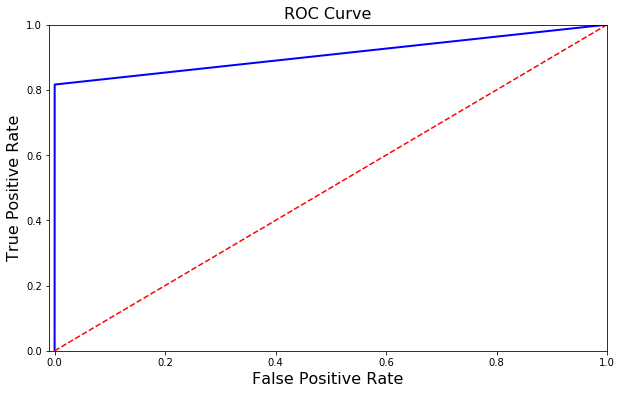

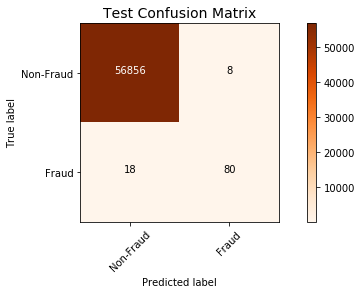

In [36]:
from helper_functions_comprehensive import custom_classification_metrics_function
custom_classification_metrics_function(X_test, y_test, labels, classifier, data_type='Test')

In [37]:
from helper_functions_comprehensive import precision_at_recall_threshold_function
predicted_proba = classifier.predict_proba(X_test)[:,1]
threshold_precision = precision_at_recall_threshold_function(y_test, predicted_proba, 
                                                             recall_threshold=0.85)

# For comparison, lets print the precision at the recall threshold of 85%
print(threshold_precision)

0.8585858585858586


The results are slightly are same as before. So I am not going to use the dataset obtained by the Outlier detection.
Instead use the best resampling results

### <a id = 6> Resampled Data Export

Lets use the resampled data as the starting point in the future weeks

In [39]:
X_resampled_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32
1,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99
2,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10
3,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10
4,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10


In [40]:
from helper_functions_comprehensive import data_export_function

In [41]:
data_export_function(X_resampled_train, y_resampled_train, y_train, y_test, 
                         intermediate_data_path, output_df_file_name, export_date)

## <a id='7'>References</a> 

A very good Kaggle notebook for understanding SMOTE 
https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

Understanding IQR and Z scores for Outlier detection and removal
http://colingorrie.github.io/outlier-detection.html

In [42]:
# In future weeks, we are going to try out feature engineering to synthetically increase the number of features available